# Importing of classes #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib
from sklearn import ensemble
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from scipy import stats

# Data Exploration and Reading # 
The data is about predicting the price of the flight tickets. The data is given in the form of a csv file. The data is read using the pandas library. The data is then explored to get a better understanding of the data.

### Importing the dataset 

In [2]:
data = pd.read_csv('Data/heart_data.csv')
print(data)

       index     id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0          0      0  18393       2     168    62.0    110     80            1   
1          1      1  20228       1     156    85.0    140     90            3   
2          2      2  18857       1     165    64.0    130     70            3   
3          3      3  17623       2     169    82.0    150    100            1   
4          4      4  17474       1     156    56.0    100     60            1   
...      ...    ...    ...     ...     ...     ...    ...    ...          ...   
69995  69995  99993  19240       2     168    76.0    120     80            1   
69996  69996  99995  22601       1     158   126.0    140     90            2   
69997  69997  99996  19066       2     183   105.0    180     90            3   
69998  69998  99998  22431       1     163    72.0    135     80            1   
69999  69999  99999  20540       1     170    72.0    120     80            2   

       gluc  smoke  alco  a

#### Columns of Dataset
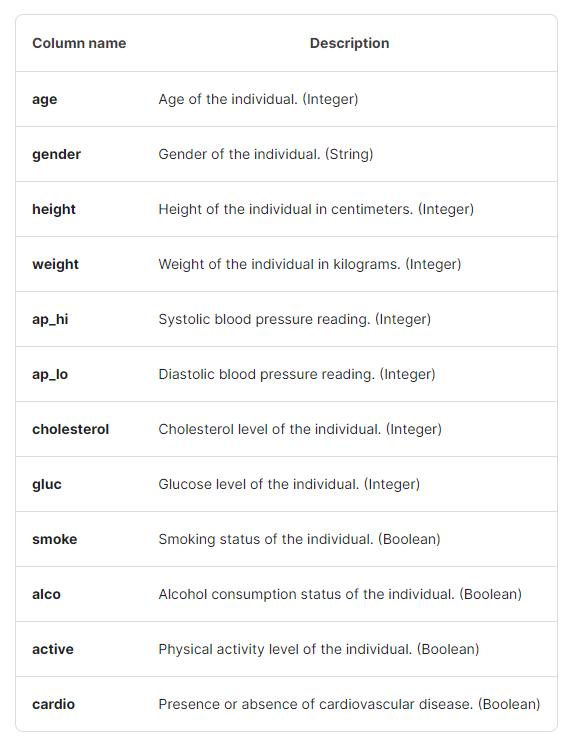\
As it can be seen in the image above, the columns of the dataset has these meanings:
* age: 
    - Age of the participant
* gender: 
    - Gender of the participant in terms of binary(1/2). 1 being Male and 2 being Female.
* height: 
    - Height of the participant in centimeters.
* weight: 
    - Weight of the participant in kilograms.
* ap_hi: 
    - Systolic blood pressure.
* ap_lo: 
    - Diastolic blood pressure.
* cholesterol: 
    - Cholesterol level in the blood.
* gluc: 
    - Glucose level in the blood. 
* smoke: 
    - Whether the participant smokes or not.
    - This data is in terms of binary(1/0). 1 being the person smokes and 0 being the person does not smoke.
* alco: 
    - Whether the participant drinks alcohol or not. 
    - This data is in terms of binary(1/0). 1 being the person drinks alcohol and 0 being the person does not drink alcohol.
* active: 
    - Whether the participant is active or not. 
    - This data is in terms of binary(1/0). 1 being the person is active and 0 being the person is not active.
* cardio: 
    - Whether the participant has cardiovascular disease or not. 
    - This data is in terms of binary(1/0). 1 being the person has cardiovascular disease and 0 being the person does not have cardiovascular disease.

### Dataset cleaning
- Assumption:
     - Based off my knowledge, it can be seen that index and id can be deleted as these 2 columns are just 2 unique identifiers and does not affect the learning process

In [3]:
#Remove the Unnamed: 0 column from the dataset
del data['index']
del data['id']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


#### Checking for Missing Data

In [4]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Missing Data observations
As it can be seen from above, the dataset does not have any missing data.

#### Checking for Outliers
This is to check for outliers in the data. The outliers are removed using the z-score method.

In [5]:
data.shape

(70000, 12)

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            3663.0
gender            1.0
height           11.0
weight           17.0
ap_hi            20.0
ap_lo            10.0
cholesterol       1.0
gluc              0.0
smoke             0.0
alco              0.0
active            0.0
cardio            1.0
dtype: float64


In [7]:
print((data < (Q1 - 1.5 * IQR))) and ((data > (Q3 + 1.5 * IQR)))

         age  gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  smoke  \
0      False   False   False   False  False  False        False  False  False   
1      False   False   False   False  False  False        False  False  False   
2      False   False   False   False  False  False        False  False  False   
3      False   False   False   False  False  False        False  False  False   
4      False   False   False   False  False   True        False  False  False   
...      ...     ...     ...     ...    ...    ...          ...    ...    ...   
69995  False   False   False   False  False  False        False  False  False   
69996  False   False   False   False  False  False        False  False  False   
69997  False   False   False   False  False  False        False  False  False   
69998  False   False   False   False  False  False        False  False  False   
69999  False   False   False   False  False  False        False  False  False   

        alco  active  cardi

Looking at the table, it can be seen that there are some outliers in the active and ap_lo column. The outliers are removed using the IQR method.

In [8]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
data.shape

(38023, 12)

As it can be seen, the outliers are removed.

In [10]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
8,17668,1,158,71.0,110,70,1,1,0,0,1,0


As it can be seen in here, the age is not a value that is what we want. The value of age is in a value that is not desired.

#### Feature Engineering
- Convert the interger value in age to a value that is desired which is years.
- Assumption:
    - The integer value in age is considered as the days old of the person.
    - Hence, we take the value in the column and divide it by 365 to get the age in years

In [11]:
data['age'] = data['age'] / 365
data['age'] = data['age'].astype(int)

In [12]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
6,60,1,157,93.0,130,80,3,1,0,0,1,0
8,48,1,158,71.0,110,70,1,1,0,0,1,0


### Feature Engineering Conclusion
The reason for needing to do feature engineering is because the value of age is not in a value that is desired. Hence, the value of age is changed to a value that is desired which is years.

### Data Cleaning Conclusion
The dataset is overall really clean with no missing data. However, the value of age is not suited to do training. Hence, there is a need\
to change the value of age into a integer that is rounded up.



## Data Exploration
The data exploration is done to get a better understanding of the data. The data is explored using the plotlib library. The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot


##### Histogram of the age

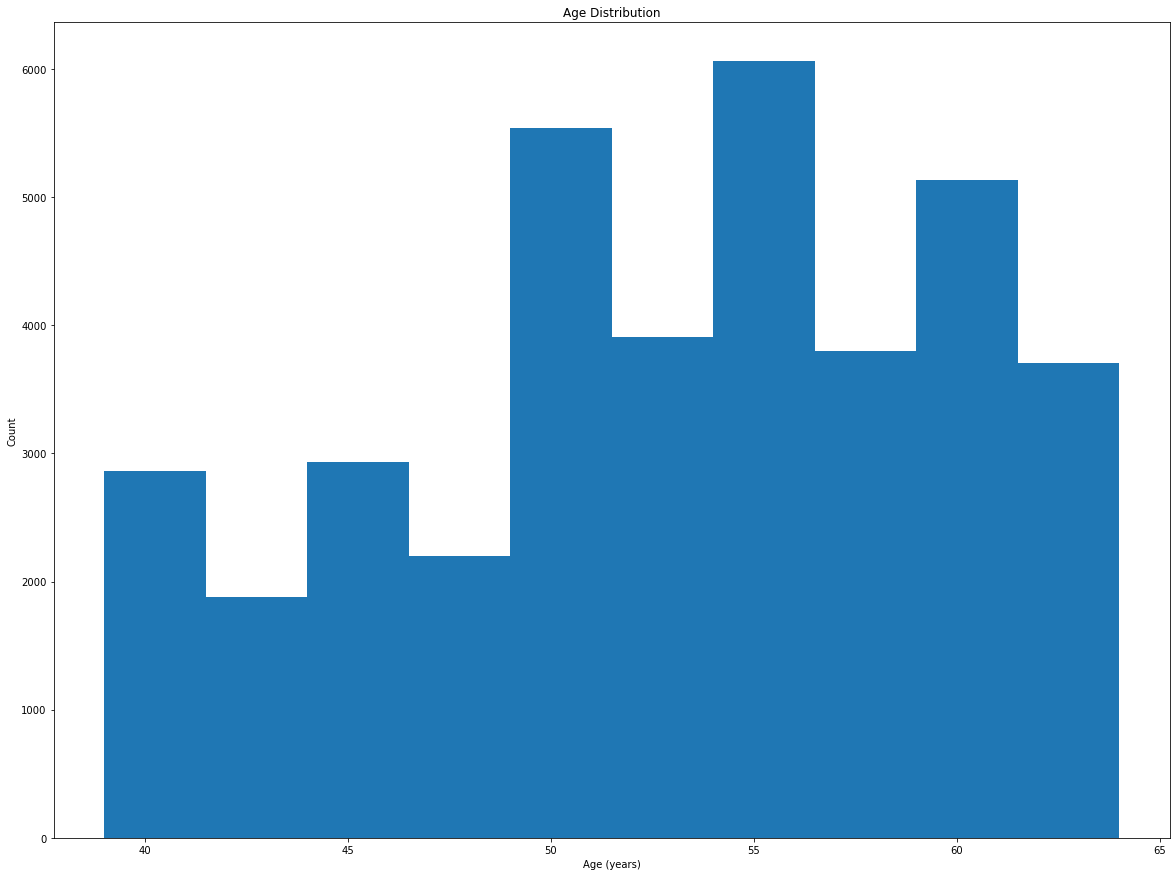

In [13]:
plt.figure(figsize=(20,15))
plt.hist(data['age'], bins=10)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

#### Histogram conclusion
To conclude, the age of 50-55 and around 58-60 are the highest frequency in the dataset.

#### Scatter Plot of Ap_hi and Ap_lo with the feature Cardio as an indicator
- Scatter plot is used to see the relationship between 2 numerical variables.
- The ap_hi and ap_lo are the blood pressure of the patient. The cardio is the indicator of whether the patient has a heart disease or not.
    - 0 = No heart disease
    - 1 = Heart disease
    - Assumption: 
        - The yellow dots indicate 1 which is heart disease and the purple dots indicate 0 which is no heart disease.

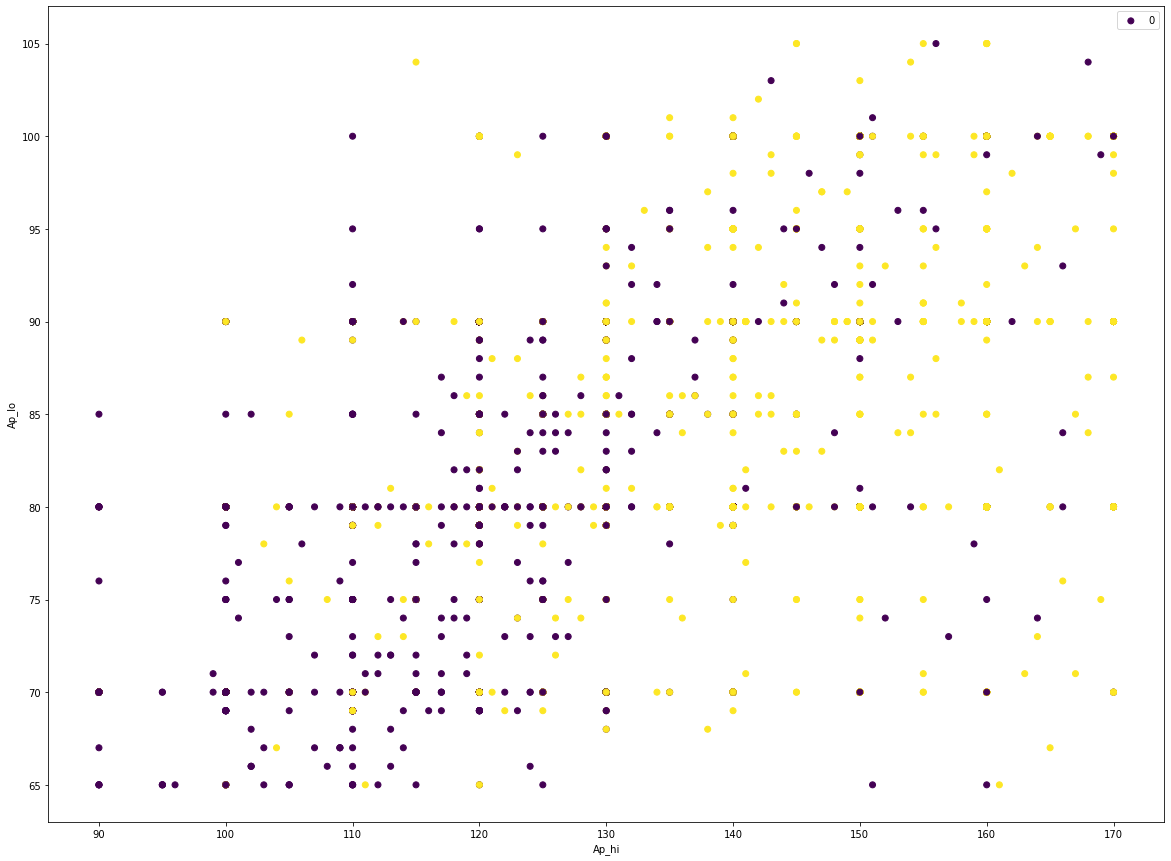

In [14]:
plt.figure(figsize=(20,15))
plt.scatter(data['ap_hi'],data['ap_lo'], c =data['cardio'])
plt.xlabel('Ap_hi')
plt.ylabel('Ap_lo')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Observation
As it can be seen in the scatter plot, the spread of the cardio being 1 is found more towards the higher Ap_hi and Ap_lo. This is because the higher the blood pressure, the higher the chance of having a heart disease.\
There is also a positive gradient in the scatter plot. This is because the higher the blood pressure, the higher the chance of having a heart disease.


#### Histogram of All Data

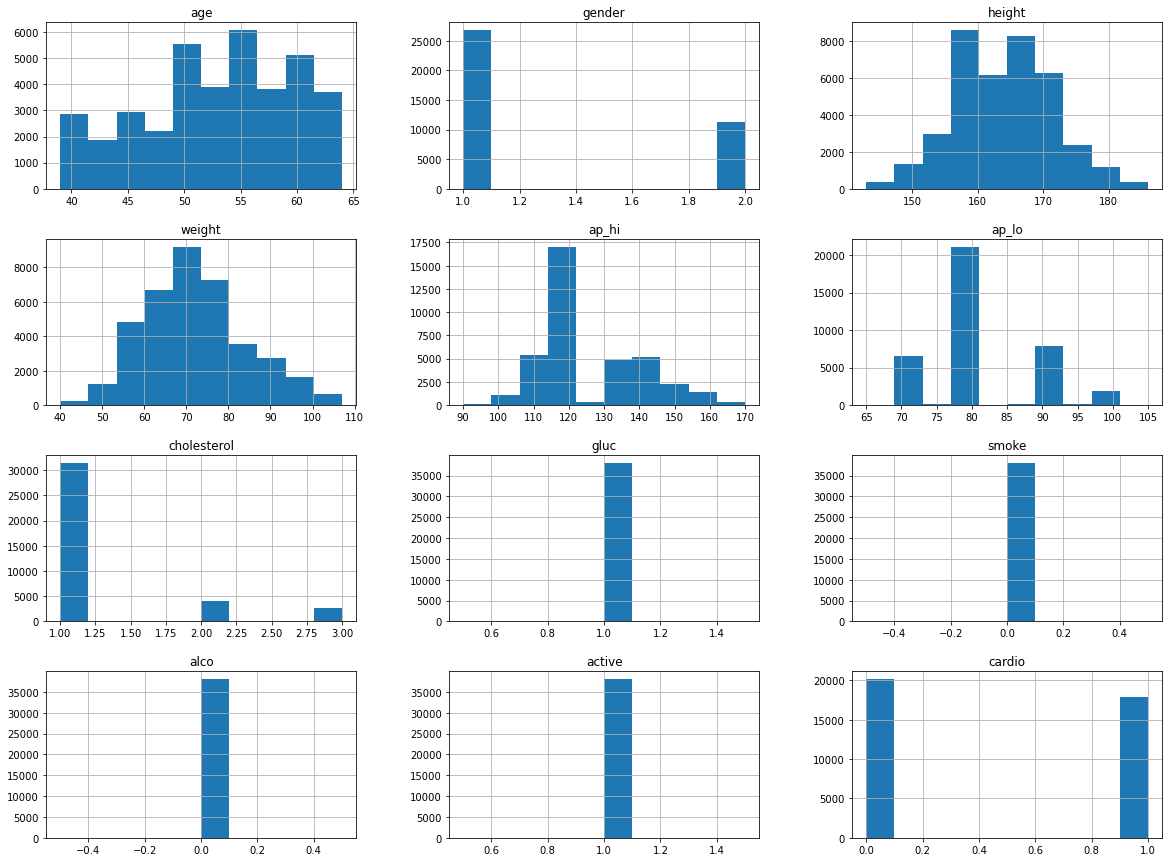

In [15]:
histogram = data.hist(bins=10, figsize=(20,15))

#### Histogram Conclusion
This historgram shows all the frequency of the features. It can be seen that the most frequent feature is the age of 50-55 and around 58-60.\
Through this data, it can be seen that this dataset is mostly taken from people around the age of 50-60.\
The dataset also shows that majority of the people do not smoke or drink alcohol.\
The dataset also shows that half of the people have heart disease according to the histogram cardio. It shows that the value 1 and 0 has the same frequency.\
The dataset also shows that majority of the people do not have diabetes.\
The dataset also shows that majority of the people do not have high blood pressure.\
The dataset also shows that majority of the people do not have high cholesterol.\
The dataset shows that the most frequent height is around 155-160cm.\
Based of the frequency of the data for alco, active, gluc and smoke, it can be seen that there is only one type of data inside the dataset

#### Scatter Plot of Height and Weight with the feature Cardio as an indicator

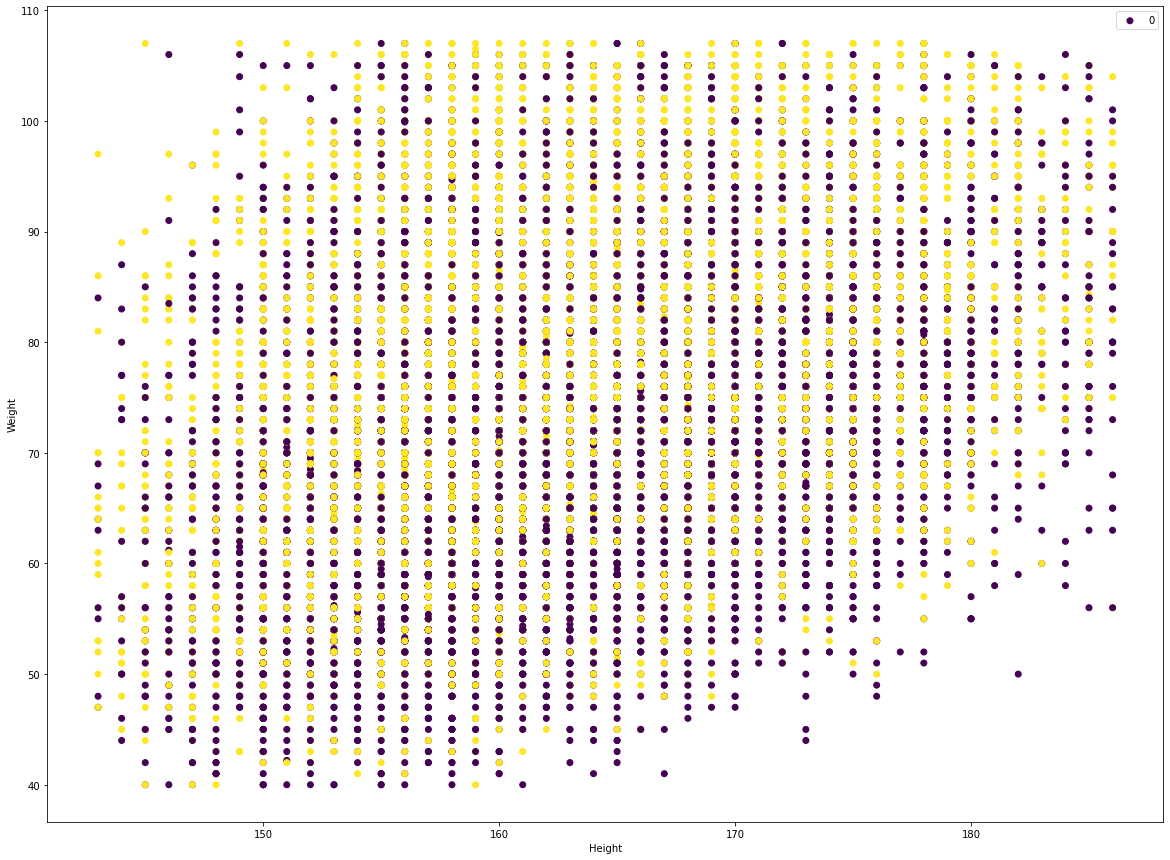

In [16]:
plt.figure(figsize=(20,15))
plt.scatter(data['height'], data['weight'], c = data['cardio'], )
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Observation
It can be seen that the purple dots which is the no heart disease is more spread out than the yellow dots which is the heart disease.\
It can also be seen that people with a heavier weight has a higher chance of having heart disease.\
This is because, from the scatter plot, the yellow dots populate the graph at the areas where the weight is higher.\
It can also be seen that there is a slight positive gradient in the scatter plot. This shows that when the person is heavier, they have a higher height. However, in the scatter plot, it can be also seen that the yellow dots populate the graph at the areas where the weight is heavier.\
This shows that the person is heavier, they have a higher chance of having heart disease.

#### Box Plot of Weight by Age

<AxesSubplot: title={'center': 'weight'}, xlabel='age'>

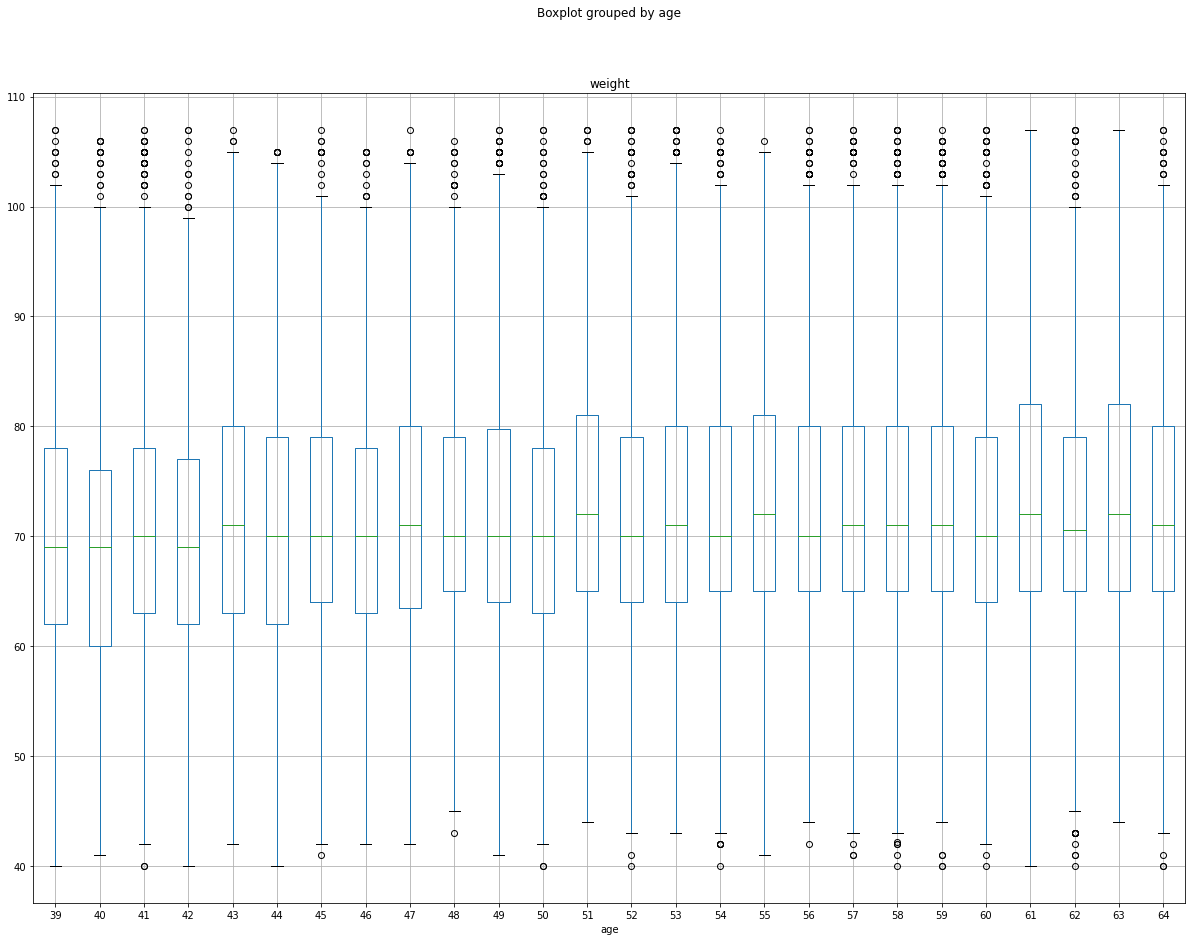

In [17]:
data.boxplot(column='weight', by='age', figsize=(20,15))

#### Box Plot Observation
The box plot shows that the ages of 54, 61 and 63 has the highest weight based of the median of the weights in the age group.\
Based off the box plot it can be seen that the highest max weight of the age group is around 105 to 108 kg.\
The lowest min weight of the age group is around 40 kg.

#### Box Plot of Height by Age

<AxesSubplot: title={'center': 'height'}, xlabel='age'>

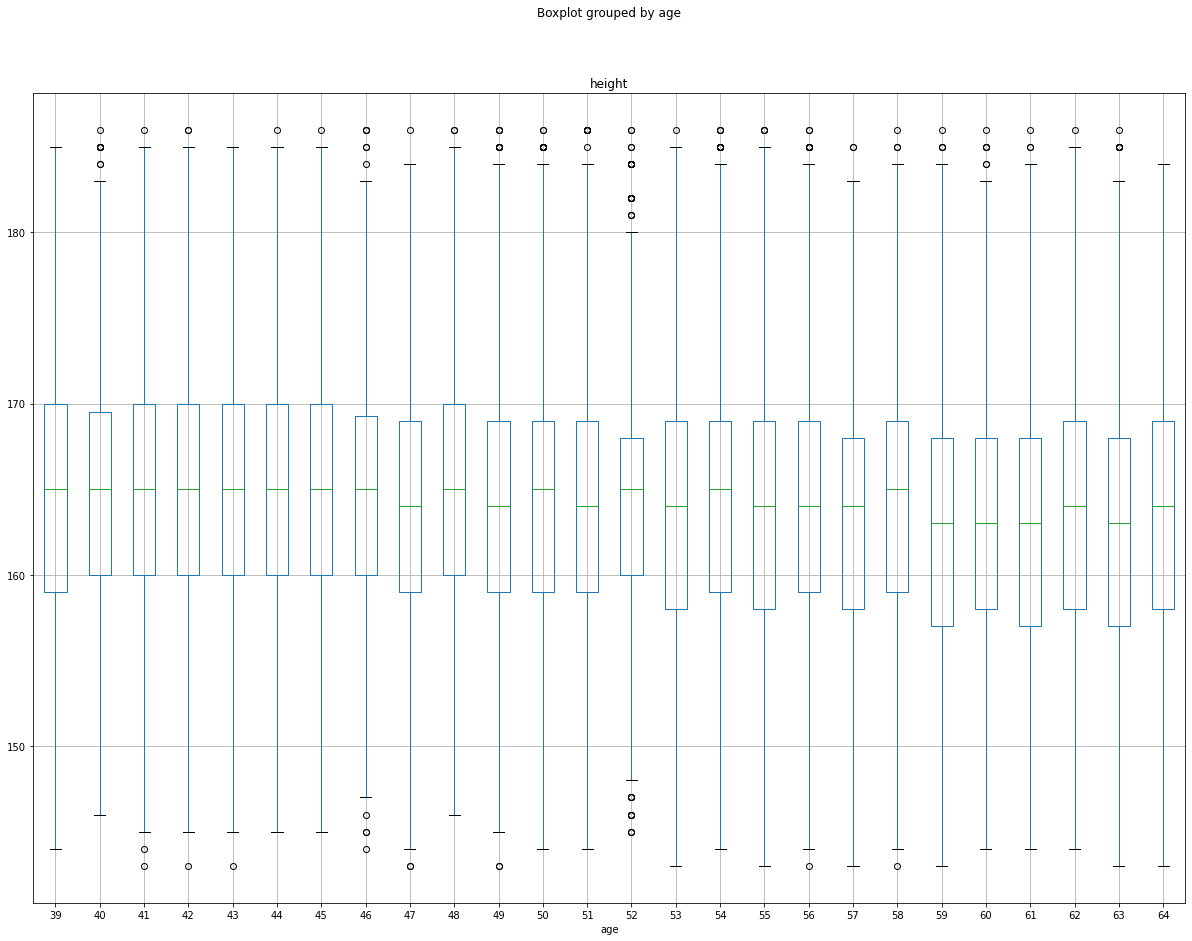

In [18]:
data.boxplot(column='height', by='age', figsize=(20,15))

#### Box Plot Observation
The box plot shows that the ages of 54 and 58 has the highest height in the group based of the median of the heights in the age group.\
Based off the box plot it can be seen that the highest max height of the age group is around 180 to 185 cm.\
The lowest min height of the age group is around 150 cm.\
The box plot also shows that the height of the age groups are even because the median of the heights are almost the same.

#### Scatter Plot of Age and Height with the feature Cardio as an indicator

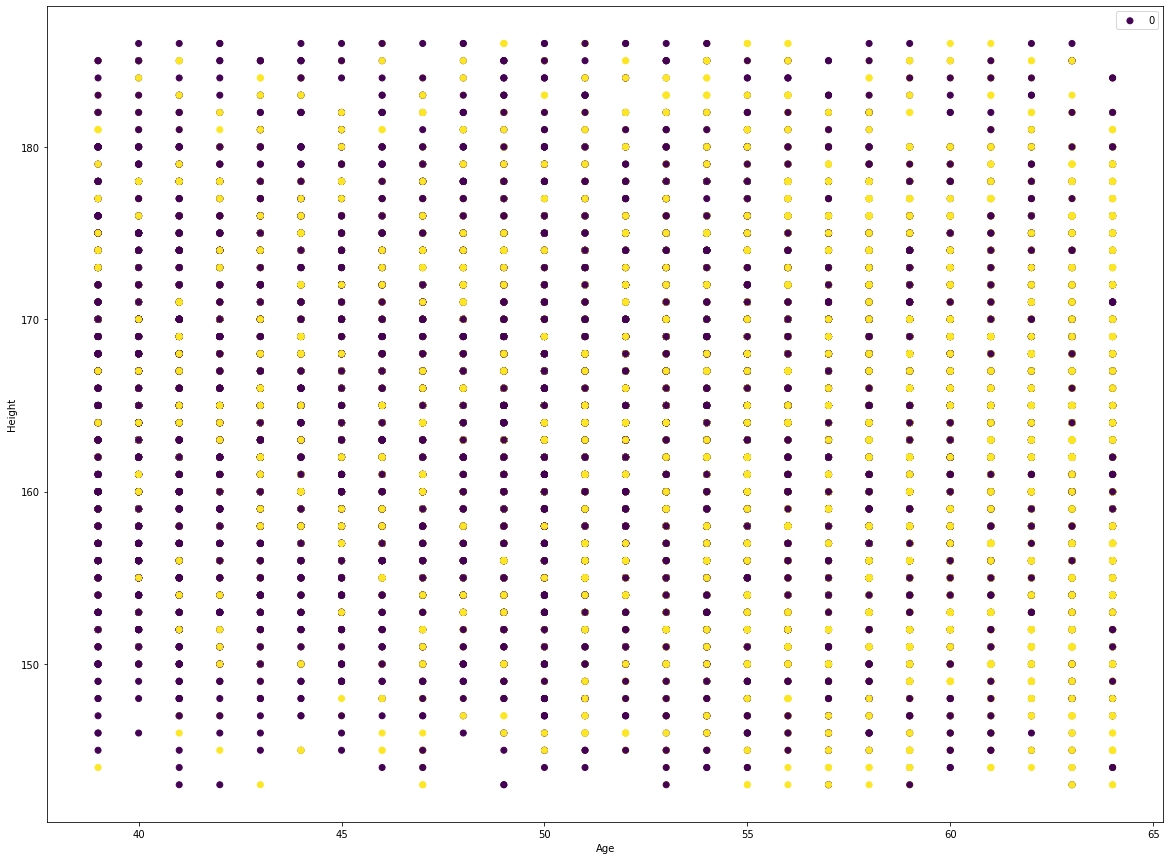

In [19]:
plt.figure(figsize=(20,15))
plt.scatter(data['age'], data['height'], c = data['cardio'], )
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend(data['cardio'])
plt.show()

#### Scatter Plot Conclusion
It can be seen that the purple dots which is the no heart disease is more spread out than the yellow dots which is the heart disease.\
It can also be seen that people with a higher age has a higher chance of having heart disease.\
This is because, from the scatter plot, the yellow dots populate the graph at the areas where the age is higher.\
The ratio of the purple dots to the yellow dots is lower at the higher age.

#### Correlation Heatmap

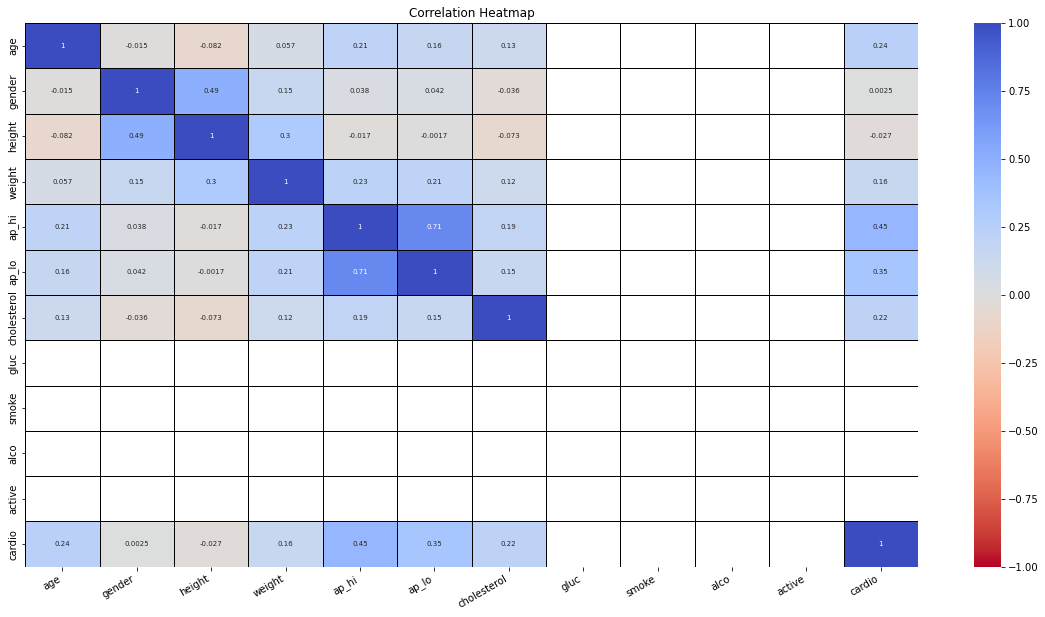

In [20]:
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(data.select_dtypes(include=['int64','float64', 'int']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})

plt.xticks(rotation=30, ha='right')
plt.title('Correlation Heatmap')

plt.show()

#### Observations of Heatmap
It can be seen that the features that are highly correlated with the target variable is the age, ap_hi and ap_lo.\
This is because, the higher the age, the higher the chance of having a heart disease.\
There is a positive correlation between age and cardio, which is the target variable.\
There is a high correlation between ap_hi and ap_low. This is beacause to calculate the blood pressure, the systolic blood pressure is divided by the diastolic blood pressure.\
There is a low correlation between the target variable, cardio, and gender. 
However, there is no relation for the 3 features, active, alco, smoke and gluc.
For the target variable, there is a relatively high correlation between ap_hi and ap_lo.\
There is a relatively high correlation between ap_hi and weight.\
There is a relatively high correlation between ap_lo and weight.\
There is a relatively high correlation between height and weight.\
There is a relatively high correlation between age and height.

#### Checking for correlation between features

In [21]:
correlation= data.corr()
print(correlation["cardio"].sort_values(ascending=False))

cardio         1.000000
ap_hi          0.447876
ap_lo          0.347267
age            0.238199
cholesterol    0.217902
weight         0.155761
gender         0.002516
height        -0.027172
gluc                NaN
smoke               NaN
alco                NaN
active              NaN
Name: cardio, dtype: float64


Through the correlation data that has been printed out, it can be seen that there is a high correlation between ap_hi with cardio and ap_lo with cardio.\
This is because, the higher the blood pressure, the higher the chance of having a heart disease.

## Data Exploration Conclusion
The data exploration is done to get a better understanding of the data.\
The data is explored using the plotlib library.\
The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot
- Correlation Heatmap
- Correlation Data
###
Through the data exploration, it can be seen that the age of 50-55 and around 58-60 are the highest frequency in the dataset.\
It can also be seen that the most frequent feature is the age of 50-55 and around 58-60.\
Through this data, it can be seen that this dataset is mostly taken from people around the age of 50-60.\
This shows that the most common relation between the target variable is the ap_hi and ap_lo.\
Because based of domain knowledge, the higher the blood pressure, the higher the chance of having a heart disease.

# Start of the Machine Learning Process
1. Remove the column cardio, because it is the column that we are going to predict.
2. Split the data into training and testing data.
3. Train the model using the training data.
4. Test the model using the testing data.
5. Evaluate the model using the accuracy score.
6. Choose the best model.
7. Choose the right features for the model.
8. Do a grid search of the model to find the best parameters.
9. Train the model using the training data.
10. Test the model using the testing data.
11. Evaluate the model using the hyper parameters.
12. Feature Importance
13. Feature engineering
14. Retraining of model
15. Test the prediction
16. Conclusion

### Splitting the data into train and test data

Assumption:
The train_size of the dataset should be 80% of the dataset. This is to allow more data to be trained into the model.\
The train_size of the dataset is also 80% to prevent overfitting.

1. Remove the column cardio, because it is the column that we are going to predict.

In [22]:
#Splits the new data into training and testing sets
y = data['cardio'].values
del data['cardio']
X = data.values 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

## Training the Models
The models that are used are:
 - Decision Tree Classification
 - Random Forest Classification
 - Gradient Boosting Classifiers
 - Logistic Regressor
 ###
Assumption:
 - The models are chosen based off the data exploration and the data cleaning.
 - The models will be run with the default parameters.
 ###
Reason:
 - The reason classifiers are chosen is because the data that is being predicted is a true or false data. 
 - The data that is being predicted is not a continuous data. Hence, the classifiers are chosen.
 - Classifiers are chosen because the data is categorical data.

In [23]:
DC = DecisionTreeClassifier()
RC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression()
SVC = SVC()
KNN = KNeighborsClassifier()
ABC = AdaBoostClassifier()

### Fitting data into the models

In [24]:
LR.fit(X_train, y_train)
DC.fit(X_train, y_train)
RC.fit(X_train, y_train)
GBC.fit(X_train, y_train)
SVC.fit(X_train, y_train)
KNN.fit(X_train, y_train)
ABC.fit(X_train, y_train)

c:\Users\AngJi\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier()

#### Checking for accuracy of models

In [25]:
print("Logistic Regression:", accuracy_score(y_test, LR.predict(X_test)))
print("Decision Tree Classifier:", accuracy_score(y_test, DC.predict(X_test)))
print("Random Forest Classifier:", accuracy_score(y_test, RC.predict(X_test)))
print("Gradient Boosting Classifier", accuracy_score(y_test, GBC.predict(X_test)))
print("SVC:", accuracy_score(y_test, SVC.predict(X_test)))
print("KNeighbors Classifier", accuracy_score(y_test, KNN.predict(X_test)))
print("AdaBoost Classifier", accuracy_score(y_test, ABC.predict(X_test)))

Logistic Regression: 0.7353057199211045
Decision Tree Classifier: 0.651413543721236
Random Forest Classifier: 0.7007232084155162
Gradient Boosting Classifier 0.7431952662721893
SVC: 0.7266272189349112
KNeighbors Classifier 0.6928336620644313
AdaBoost Classifier 0.7372781065088757


In [26]:
print("Logistic Regression", mean_absolute_error(y_test, LR.predict(X_test)))
print("Decision Tree Classifier", mean_absolute_error(y_test, DC.predict(X_test)))
print("Random Forest Classifier", mean_absolute_error(y_test, RC.predict(X_test)))
print("Gradient Boosting Classifier", mean_absolute_error(y_test, GBC.predict(X_test)))
print("SVC", mean_absolute_error(y_test, SVC.predict(X_test)))
print("KNeighbors Classifier",mean_absolute_error(y_test, KNN.predict(X_test)))
print("Ada Boost Classifier", mean_absolute_error(y_test, ABC.predict(X_test)))

Logistic Regression 0.26469428007889545
Decision Tree Classifier 0.34858645627876395
Random Forest Classifier 0.2992767915844839
Gradient Boosting Classifier 0.25680473372781065
SVC 0.2733727810650888
KNeighbors Classifier 0.3071663379355687
Ada Boost Classifier 0.26272189349112424


#### Conclusion of the models
Based of the accuracy scores and the mean absolute error.\
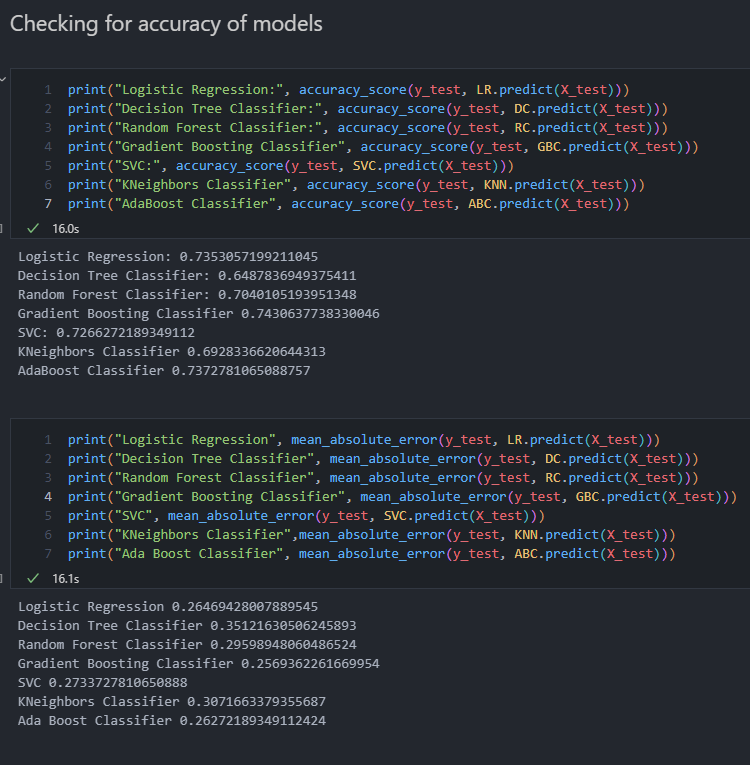\
We can see that Gradient Boosting Classifier has the highest accuracy score and the lowest mean absolute error.\
Hence, the Gradient Boosting Classifier is chosen as the best model.

### Halving Grid Search
This is to find out which parameters would work best with the Gradient Boosting Classifier
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting
     - The grid search used is HalvingGridSearch. This is because the computing time of a normal GridSearch with over 30k rows of data will take too long. Hence, the HalvingGridSearch is used to reduce the computing time.

In [52]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
}

# Create the model
model = GradientBoostingClassifier()

# Define the grid search we want to run. Run it with all cpus in parallel.
gs_cv = HalvingGridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 10139
max_resources_: 30418
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 10139
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 30417
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'learning_rate': 0.1}


#### Conclusion
The reason for using halve grid search is because of the size of the data being too large.\
The halve grid search is used to reduce the computing time of the grid search.\
The assumptions will also not decrease the accuracy of the model.

#### Halving Grid Search Result
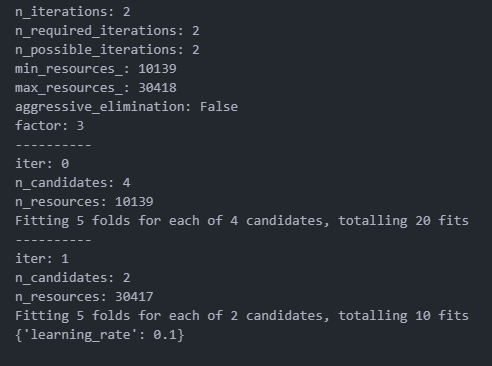\
The best parameters for the Gradient Boosting Classifier is:
 - learning_rate = 0.1

### Gradient Boosting Classifier
This is to find out which parameters would work best with the Gradient Boosting Classifier
 - This is to dump a model into a file to be used later on. The model will have the hyper parameters created from the grid search.
 - Afterwards, the importance of the features will be shown.
 - These features will later on be removed.

In [28]:
model = GradientBoostingClassifier(learning_rate= 0.1)
model.fit(X_train, y_train)
joblib.dump(model, 'Model/heart_disease_model.pkl')

['Model/heart_disease_model.pkl']

#### New Accuracy of the Gradient Boosting Classifier with Grid Search

In [29]:
gsv_model = joblib.load('Model/heart_disease_model.pkl')
print(accuracy_score(y_test, gsv_model.predict(X_test)))

0.7431952662721893


## Conclusion of the Gradient Boosting Classifier with Grid Search
The accuracy of the Gradient Boosting Classifier with Grid Search is 0.7431.\
This is a 0.01% increase from the accuracy of the Gradient Boosting Classifier without Grid Search.\
Hence, this hyper parameter tuning increases the accuracy of the model by 0.01%.

The hyper parameters allowed the model to have a increase in the accuracy by 0.01%, as seen in the image below.\
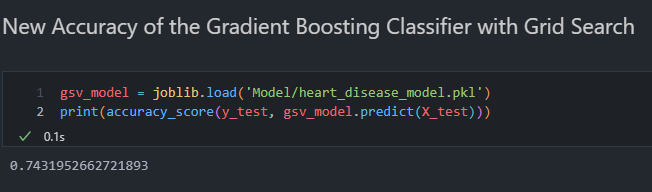\
The hyper parameters that was found using Grid Search were causing either a overfit or underfit and hence, the accuracy decreased.\
Hence, the model will only run on one set of hyper parameters.

# Feature Selection based on Importance

#### Choosing the best features from the Gradient Boosting Regressor
Any features that are under 0.1% are removed from the dataset.

In [30]:
model = joblib.load('Model/heart_disease_model.pkl')
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(data.columns[index], (importance[index] * 100.0)))

gluc - 0.00%
smoke - 0.00%
alco - 0.00%
active - 0.00%
gender - 0.18%
height - 0.69%
ap_lo - 0.90%
weight - 1.40%
cholesterol - 7.47%
age - 12.80%
ap_hi - 76.56%


#### Feature Importance
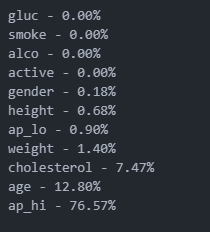\
As it can be seen in the image, these are the features that are important to the model in terms of percentage.\
Assumption:
 - The features that are not important to the model are the features that have a precentage of less than 0.5%.
###
These features are then removed:
 - gluc
 - smoke
 - alco
 - active
 - gender
###
According to the data above, it can be seen that the features that are important to the model are:
 - age
 - ap_hi
 - ap_lo
 - cholesterol
 - height
 - weight
 - cardio
###
Observations:
 - ap_hi has one of the highest relation to the model. This is because, the higher the blood pressure, the higher the chance of having a heart disease.

#### Removing the features that are not important
- Assumption:
    - The features that have a total percentage less than 0.1% will be removed from the dataset.
    - Reason:
        - The features that have a percentage less than 0.1% will be removed from the dataset as they are not important to the model.

In [31]:
del data['alco']
del data['active']
del data['smoke']
del data['gluc']
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol
0,50,2,168,62.0,110,80,1
1,55,1,156,85.0,140,90,3
3,48,2,169,82.0,150,100,1
6,60,1,157,93.0,130,80,3
8,48,1,158,71.0,110,70,1


#### Observation of table
This is the new dataset where the features that are not important to the model are removed.\
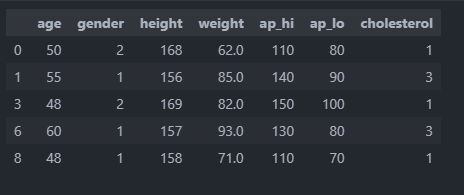\
Original table:\
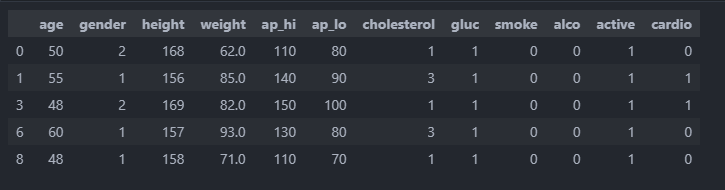

## Retraining the model
The model is retrained with the new dataset.\
This model has all the features that have no percentage removed from the dataset.

#### Feature Engineering the new dataset
No new feature engineering is done as the features that are removed are not important to the model.\
The features that are important to the model have already been feature engineered.\
The features that are important to the model are:
 - age
 - ap_hi
 - ap_lo
 - height
 - weight
 - cholesterol
 - gender

#### Split the new data without the features
The y value is taken from the above, which is the cadrio column.\
The x value is taken from the above, which is the dataset without the cardio column and the removed features.\
The train_size is set to 80% of the dataset.\
The test_size is set to 20% of the dataset.

In [32]:
X = data.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

### Halve Grid Search for the new dataset

In [33]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
}

model = GradientBoostingClassifier()
gs_cv = HalvingGridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
gs_cv.fit(X_train, y_train)
print(gs_cv.best_params_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 10139
max_resources_: 30418
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 10139
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 1
n_candidates: 2
n_resources: 30417
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'learning_rate': 0.1}


#### Halve Grid Search Result
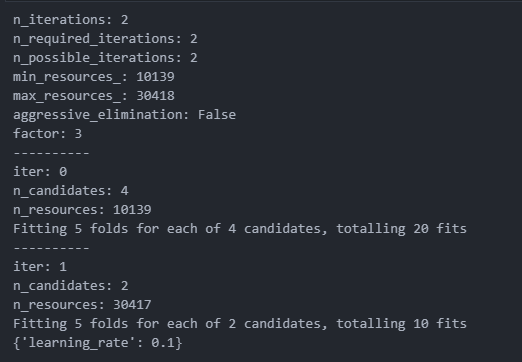\
This is the best hyper parameter for the Gradient Boosting Classifier.\
The best hyper parameter for the Gradient Boosting Classifier is:
 - learning_rate = 0.1

### Training the model
The model is trained with the new dataset and the hyper parameters found with the halving grid search.

In [34]:
model = GradientBoostingClassifier(learning_rate= 0.1)
model.fit(X_train, y_train)
joblib.dump(model, 'Model/heart_disease_final_model.pkl')

['Model/heart_disease_final_model.pkl']

In [35]:
final_model = joblib.load('Model/heart_disease_final_model.pkl')
print(accuracy_score(y_test, final_model.predict(X_test)))

0.7430637738330046


The code above is retraining the model with the same Classifier and the same hyper parameters.\
This is to allow the model to learn the new dataset without the faetures.

#### Testing the model
The model is tested with the first row of the data set.\
This is to see whether the model can predict the data correctly.

In [36]:
print("Presence of Cardiovascular Disease: ", final_model.predict([[50, 2, 168, 62.0, 110, 80, 1]]))

Presence of Cardiovascular Disease:  [0]


This is the first row of the dataset.\
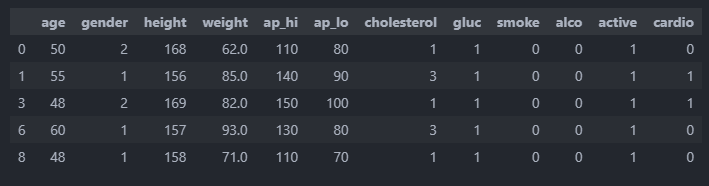

In [37]:
print("Presence of Cardiovascular Disease: ", final_model.predict([[65, 2, 175, 58.0, 130, 90, 1]]))

Presence of Cardiovascular Disease:  [1]


The code above is to test the prediction of the model and to see whether there will be any errors occuring during prediction.

#### Conclusion of the model
Based of testing the model, it can be seen that the model is able to predict the data correctly.\
This is because according to the image:\
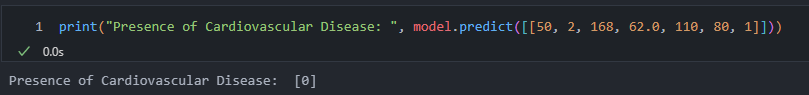\
The model predicted has a value of 0.\
The actual value of the data is 0. The parameters for predicting is the first row of the data.\
Hence, the model is able to predict the data correctly.\
Another example to show that the model is able to predict the data:\
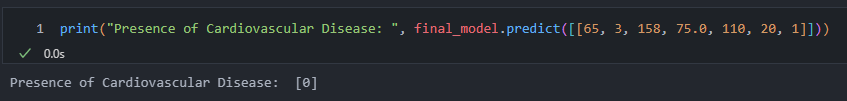

### Conclusion of the new dataset
The model will be trained with the new dataset with the same settings as the previous model.\
The model will be tested with the first row of the dataset.\
The model is then able to accurately predict the data with the new dataset.\
The accuracy of the model is the same as before because the model is trained with the dataset where all the features that are 0% are removed.\
The model is then able to predict the data with the new dataset.

# Final Conclusion
The model has been fully trained. The model is ready to be deployed into the web application where it receives the data and predicts the data based on what is sent to it.\
To conclude, the model is based on the dataset and is able to predict the data with an accuracy of 74.31%.\
The model is able to predict the data with an accuracy of 74.31% because of the features that are important to the model.\
The features that are important to the model are:
 - age
 - ap_hi
 - ap_lo
 - height
 - weight
 - cholestrol
###
Hence, when sending data from the web application, the data must be sent according to the features that are important to the model.
This model will be used to predict the values of the data from the web application using Flask.\
###
Therefore, to conclude, what I have done here is to clean the dataset that I have chosen. Explanation of what each feature for the dataset has also been explained. The data exploration has been shown for all the numeric values and a correlation heatmap has been made to show the correlation between numeric values and binary values. Hence, the model is completed and the model is ready to be deployed into the web application.